In [4]:
def list_mul(L, m):
    """ Multiply all elements of L by m."""
    return [m * x for x in L]

def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [list_mul(L, m) for L in M]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(h, t, U, extra = 0):  
    v = np.matmul(U, h)
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = 0.5*(np.tanh(v0) - x)
    ydot = 0.5*(np.tanh(v1) - y)
    
    return [xdot, ydot]

# Create the grid in the domain [-1, 1] x [-1, 1].
lo, hi = -2, 2
X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
u, v = np.zeros(X.shape), np.zeros(Y.shape)

def draw_phase_portrait(U, size, title_str = 'Phase portrait'):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = f([X[i, j], Y[i, j]], 0, U)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 50, 2000)  
        xs = odeint(f, x_init, times, args = (U, 0))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end

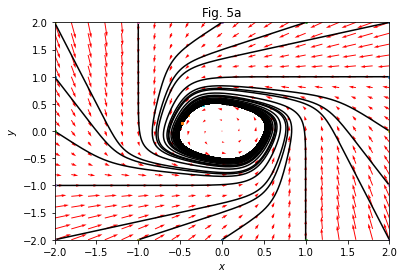

In [17]:
U = np.matrix([[1.5, -2.598],[2.598, 1.5]])
draw_phase_portrait(U, 4, 'Fig. 5a')

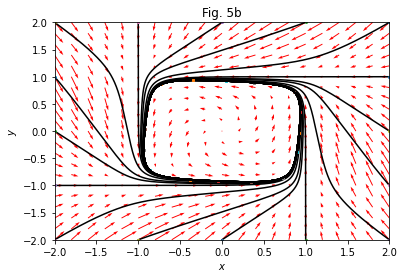

In [15]:
U = np.matrix([[2.4271, -1.7634],[1.7634, 2.4271]])
draw_phase_portrait(U, 4, 'Fig. 5b')

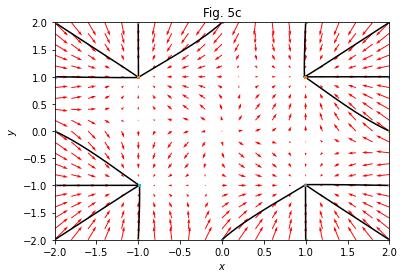

In [16]:
U = np.matrix([[2.9665, -0.4471],[0.4471, 2.9665]])
draw_phase_portrait(U, 4, 'Fig. 5c')

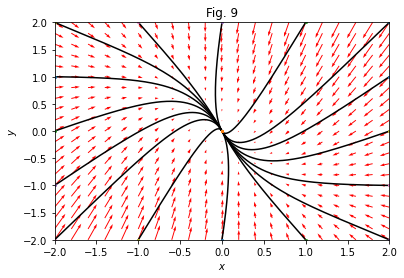

In [18]:
U = np.matrix([[0.1, -0.1],[-1, 0]])
draw_phase_portrait(U, 4, 'Fig. 9')

In [34]:
import math

def sigma(x):
    return math.exp(-np.logaddexp(0, -x))

def get_r(Ur, h, br):
    v = np.matmul(Ur, h) + br
    return np.array([sigma(v[0, 0]), sigma(v[0, 1])])
    
def g(h, t, Uh, bh, Ur, br):  
    v = np.matmul(U, np.multiply(get_r(Ur, h, br), h)) + bh
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = -x + np.tanh(v0)
    ydot =  y + np.tanh(v1)
    
    return [xdot, ydot]



def draw_phase_portrait_2(Uh, bh, Ur, br, size, title_str = 'Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size, 0.5*size
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = g([X[i, j], Y[i, j]], 0, Uh, bh, Ur, br)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 50, 2000)  
        xs = odeint(g, x_init, times, args = (Uh, bh, Ur, br))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end

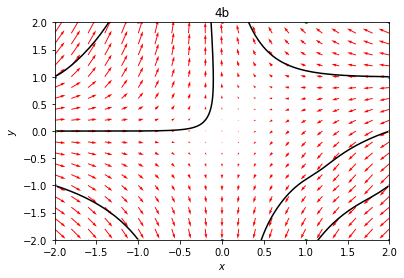

In [24]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[5, 9], [9, 5]])
bh = np.array([0, 0])
br = np.array([0, 0])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '4b')

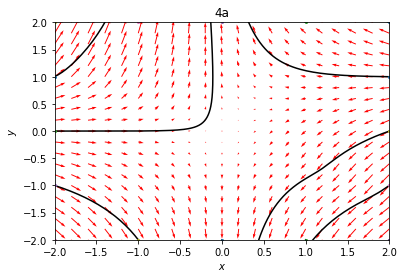

In [25]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[5, 9], [5, 9]])
bh = np.array([0, 0])
br = np.array([0, 0])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '4a')

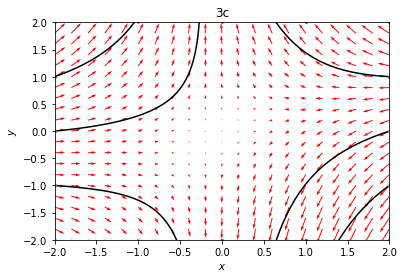

In [26]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[1, -2], [3, 1]])
bh = np.array([-0.06, 0])
br = np.array([0.2, -0.85])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '3c')

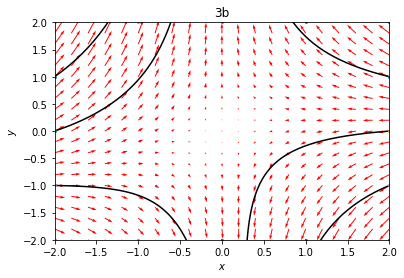

In [27]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[-1, 0], [0, -1]])
bh = np.array([0, 0])
br = np.array([0, 0])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '3b')

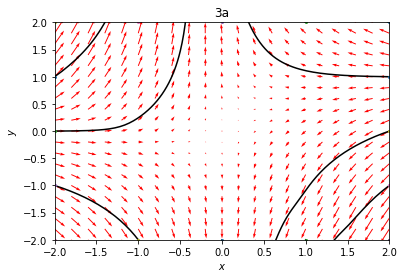

In [28]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[5, 8], [8, 5]])
bh = np.array([0, 0])
br = np.array([5, 5])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '3a')

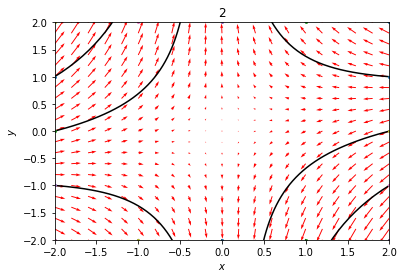

In [37]:
Uh = np.matrix([[3, 0], [0, 3]])
Ur = np.matrix([[0, 0], [0, 0]])
bh = np.array([0, 0])
br = np.array([0, 0])
draw_phase_portrait_2(Uh, bh, Ur, br, 4, title_str = '2')